# The Three Body Problem  
Using Verlet intergration evolve a 3 body system for position and velocity.  
Calculate angular momentum of the bodies.  
Calculate total energy (potential and kinetic).  
### Verlet  
velocity half step  
$ v_{n+\frac{1}{2}} = v_n +\frac{1}{2} ha (x_n) $  
$ x_{n+1} = x_n +hv_{n+\frac{1}{2}} $  
$ v_{n+1} = v_{n+\frac{1}{2}} +\frac{1}{2} ha (x_{n+1}) $  

$ h $ is timestep  
$ a(x) $ is acceleration at point x. I will calulate using the force function defined near the top, and divide it by mass. So that it in keeping with the other solvers here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
from cycler import cycler

### Functions

In [2]:
def Grav_eng(pos_e, ma_e, pos, ma):
    """Grav_eng(pos_e, ma_e, pos, ma)
    return g_e
    A function for calculating the graviational potential energy of a body.
    IN:
        pos_e: position of the planet in question.
        ma_e: mass of thhe planet in question.
        pos: an array of the position of all the planets.
        ma: an array containing the mass of all of the planets.
    OUT:
    g_e: gravitational potential energy.
    """
    ep = 1     #ep is to ensure that 1/r^2 never reaches below 1 and ballooning of energy. May need to be altered in the future
    g_e = np.array([])
    for e in range(len(ma)):
        if ma[e]==ma_e:
            print("snap")
            continue
        else:
            pass
        print(e)
        #print(pos)
        dif_x = pos[e,0] - pos_e[0]
        dif_y = pos[e,1] - pos_e[1]
        #print(f"dif_x {dif_x}, dif_y {dif_y}")
        sep = np.sqrt(dif_x**2 +dif_y**2)
        print(f"sep {sep}")
        
        g_e = np.append(g_e, (-1 * ma_e * ma[e]) / sep)
        print(f"g_e, {g_e}")

    g_e = np.sum(g_e)
    return g_e

In [3]:
def Kin_eng(vel, m):
    """Kin_eng(vel, m)
    return k_e
    A function for calculating the kinetic energy of each of the bodies.
    IN:
        vel: An array of all the velocities at that time step.
        m: an array of all th masses of the planets.
    OUT:
        An array of all the kinetic energies of the bodies."""
    x_vel = np.array([])
    y_vel = np.array([])
    print(f"vel.shape {vel.shape}")
    
    for i in range((vel.shape)[0]):
        x_vel = np.append(x_vel, vel[i,0,1])
    
    k_e = 0.5* m *vel**2
    return k_e

In [4]:
def Acceleration(pos_a, ma_a, pos, ma):
    """Acceleration(pos_a, ma_a, pos, ma)
    return x_acc, y_acc
    A function for calculating the gravitational acceleration on a planet.
    The _a is to denote the planet on question.
    IN:
        pos_a: position of the planet in question.
        ma_a: mass of thhe planet in question.
        pos: an array of the position of all the planets.
        ma: an array containing the mass of all of the planets.
    OUT:
        x_acc: the sum of the x acceleration of the body.
        y_acc: the sum of the y acceleration of the body.
    """
    ep = 1     #ep is to ensure that 1/r^2 never reaches below 1 and ballooning of acceleration. May need to be altered in the future
    x_acc = np.array([])
    y_acc = np.array([])

    #print(f"len(ma) {len(ma)},, ma {ma}")
    for g in range(len(ma)-1):
        if ma[g]==ma_a:
            continue
        else:
            pass

        #print(pos)
        dif_x = pos[g,0] - pos_a[0]
        dif_y = pos[g,1] - pos_a[1]
        #print(f"dif_x {dif_x}, dif_y {dif_y}")
        
        x_acc_temp = (-1 * ma_a)/ (dif_x**2 + ep**2)
        y_acc_temp = (-1 * ma_a)/ (dif_y**2 + ep**2)
        #print(f"x_acc_temp {x_acc_temp}, y_acc_temp {y_acc_temp}")

        x_acc = np.append(x_acc, x_acc_temp)
        y_acc = np.append(y_acc, y_acc_temp)

    #print(f"x_acc {x_acc}, y_acc {y_acc}")

    x_acc = np.sum(x_acc)
    y_acc = np.sum(y_acc)
    return x_acc, y_acc

In [27]:
def Verlet(pos_v, vel_v, ma, t_s, n_s):
    """Verlet(pos_v, vel_v, ma, t_s, n_s)
    return pos_v, vel_v
    A function for calculating the half and next step using a verlet velocity intergrator.
    IN:
        pos_v: an array of the positions of planets at the beggining of the step.
        vel_v: an array of the velocitys of planets at the beginning of the step.
        ma: an array of the masses of the planets.
        t_s: the time step
        n_s: the number of steps
    OUT:
        pos_v: the array that holds all the planet positions
        vel_v: the array that holds all the planet velocites
    """

    
    for v in range(n_s):

        pos_temp = np.array([[]])
        vel_temp = np.array([[]])
        
        for m in range(len(ma)-1):
            print(f"pos_v[m] {pos_v[m]}")
            pos_m = pos_v[m]
            vel_m = vel_v[m]
            ma_m = ma[m]
            print(f"pos_m {pos_m}")
            
            ax_half,ay_half = Acceleration(pos_a = pos_m, ma_a = ma_m, pos = pos_v, ma = ma)     #Caclaulting the x and y componets of acceleration.

            vx_half = vel_m[0] + (0.5 * t_s * ax_half)     #Caclcualting the halfstep velocities for a planet
            vy_half = vel_m[1] + (0.5 * t_s * ay_half)

            x_full = pos_m[0] + (t_s * vx_half)     #Caclcualting the fullstep positions for a planet
            y_full = pos_m[1] + (t_s * vy_half)

            vx_full = vx_half + (0.5 * t_s * x_full)     #Caclcualting the fullstep velocities for a planet
            vy_full = vy_half + (0.5 * t_s * y_full)
            #print(f"pos_temp.shape {pos_temp.shape}")
            if pos_temp.shape == (1,0):
                pos_temp = np.array([x_full, y_full])
                vel_temp = np.array([vx_full, vy_full])
            else:
                print(f"pos_temp {pos_temp},,,,, np.array([x_full, y_full]) {np.array([x_full, y_full])}")
                pos_temp = np.vstack((pos_temp, np.array([x_full, y_full])))
                vel_temp = np.vstack((vel_temp, np.array([vx_full, vy_full])))
                
        #print(f"pos_temp{pos_temp}")
        #print(f"vel_temp{vel_temp}")

        pos_v = np.vstack((pos_v, np.array([pos_temp])))
        vel_v = np.vstack((vel_v, np.array([vel_temp])))
        #print(f"pos_v {pos_v},,,,, vel_v {vel_v}")

    return pos_v, vel_v

In [6]:
help(Acceleration)

Help on function Acceleration in module __main__:

Acceleration(pos_a, ma_a, pos, ma)
    Acceleration(pos_a, ma_a, pos, ma)
    return x_acc, y_acc
    A function for calculating the gravitational acceleration on a planet.
    The _a is to denote the planet on question.
    IN:
        pos_a: position of the planet in question.
        ma_a: mass of thhe planet in question.
        pos: an array of the position of all the planets.
        ma: an array containing the mass of all of the planets.
    OUT:
        x_acc: the sum of the x acceleration of the body.
        y_acc: the sum of the y acceleration of the body.



In [7]:
no_steps = 5
time_step = 1
masses = np.array([100,1])
positions = np.array([[[1,2], [4,3]]])
velocities = np.array([[[0,0], [0,10]]])

In [8]:
print(Acceleration(pos_a = positions[0,0], ma_a = masses[0], pos = positions[0], ma = masses))

(np.float64(0.0), np.float64(0.0))


In [9]:
print(Grav_eng(pos_e = positions[0,0], ma_e = masses[0], pos = positions[0], ma = masses))

snap
1
sep 3.1622776601683795
g_e, [-31.6227766]
-31.622776601683793


In [10]:
help(Verlet)

Help on function Verlet in module __main__:

Verlet(pos_v, vel_v, ma, t_s, n_s)
    Verlet(pos_v, vel_v, ma, t_s, n_s)
    return pos_v, vel_v
    A function for calculating the half and next step using a verlet velocity intergrator.
    IN:
        pos_v: an array of the positions of planets at the beggining of the step.
        vel_v: an array of the velocitys of planets at the beginning of the step.
        ma: an array of the masses of the planets.
        t_s: the time step
        n_s: the number of steps
    OUT:
        pos_v: the array that holds all the planet positions
        vel_v: the array that holds all the planet velocites



In [26]:
positions, velocities = Verlet(pos_v = positions, vel_v = velocities, ma = masses, t_s = time_step, n_s = no_steps)

pos_v[m] [[1. 2.]
 [4. 3.]]
pos_m [[1. 2.]
 [4. 3.]]
pos_v[m] [[1. 2.]
 [4. 3.]]
pos_m [[1. 2.]
 [4. 3.]]
pos_v[m] [[1. 2.]
 [4. 3.]]
pos_m [[1. 2.]
 [4. 3.]]
pos_v[m] [[1. 2.]
 [4. 3.]]
pos_m [[1. 2.]
 [4. 3.]]
pos_v[m] [[1. 2.]
 [4. 3.]]
pos_m [[1. 2.]
 [4. 3.]]


In [12]:
positions[0]

array([[1., 2.],
       [4., 3.]])

In [13]:
positions[0,1]

array([4., 3.])

In [14]:
positions[0,1,1]

np.float64(3.0)

In [15]:
(positions.shape)[0]

6

In [16]:
help(Kin_eng)

Help on function Kin_eng in module __main__:

Kin_eng(vel, m)
    Kin_eng(vel, m)
    return k_e
    A function for calculating the kinetic energy of each of the bodies.
    IN:
        vel: An array of all the velocities at that time step.
        m: an array of all th masses of the planets.
    OUT:
        An array of all the kinetic energies of the bodies.



kinetic = Kin_eng(velocities, masses)

fig_E_L, ax_E_L = plt.subplots(1,2)
ax_E_L[0].set_title("Energy")
ax_E_L[1].set_title("Angular Momentum")
ax_E_L[0].plot(velocities)

In [17]:
positions

array([[[ 1.,  2.],
        [ 4.,  3.]],

       [[ 1.,  2.],
        [ 4., 13.]],

       [[ 1.,  2.],
        [ 4., 13.]],

       [[ 1.,  2.],
        [ 4., 13.]],

       [[ 1.,  2.],
        [ 4., 13.]],

       [[ 1.,  2.],
        [ 4., 13.]]])

In [18]:
print(positions.shape)

(6, 2, 2)


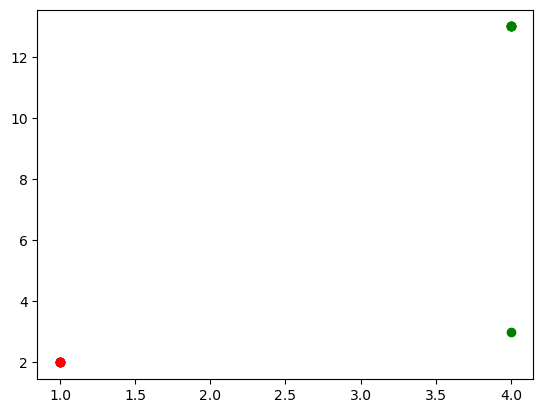

In [19]:
fig = plt.figure()
ax = fig.add_subplot()
col = ["r","g","b"]
for n in range((positions.shape)[0]):
    for x in range((positions[0].shape)[0]):        
        ax.scatter(positions[n,x,0], positions[n,x,1], color = col[x])

In [20]:
print("done")

done
